In [70]:
% pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


# Solver for schrodinger eq.

## input:
- Potential function $V(x)$.
- Set scanning range by set Emin and Emax.

## output:
- Eigenergy
- Energy spectrum if plotspec=True
- Normalized Wavefunction for each energy level if plotwf=True

In [242]:
def solveEfromV(V,xmin=-4.,xmax=4.,n=100000,Emin=0,Emax=20,Estep=0.05,plotwf=False,plotspec=True,m=1,hbar=1.):
    xvals = np.linspace(xmin,xmax,n)
    h = (xmin-xmax)/n
    
    def k2(x,E):
        return 2*m*(E-V(x))/hbar**2
    
    def d_dx(var,x,paras):
        psi, phi = var
        E, = paras
        return [phi,-k2(x,E)*psi]
    
    finals = []
    evals = np.arange(Emin,Emax,Estep)
    for E in evals:
        var0 = [0,5.]
        paras = [E]
        sol = odeint(d_dx,var0,xvals,args=(paras,))
        psivals = sol[:,0]
        psif = psivals[-1]
        finals.append(psif)
    if plotspec:
        plt.figure(figsize=(12,8),dpi=240)
        plt.plot(evals,np.abs(finals))
        plt.yscale('log')
        plt.xlabel('$E$')
        plt.ylabel('$|\psi_{final}|$')
        plt.show()
    nE = len(evals)
    print('Eigenergy:')
    if plotwf:
        plt.figure(figsize=(12,8),dpi=240)
        cnt = 0
        for i in range(1,nE-1):
            if finals[i]*finals[i+1]<0:
                if np.abs(finals[i]) < np.abs(finals[i+1]):
                    print(evals[i])
                    Enow = evals[i]
                    var0 = [0,5.]
                    paras = [Enow]
                    sol = odeint(d_dx,var0,xvals,args=(paras,))
                    psivals = sol[:,0]
                    normalize = sum(psivals**2*h)
                    psivals = psivals/np.sqrt(np.abs(normalize))
                    plt.plot(xvals,psivals,label='$n='+str(cnt)+',E='+str(evals[i])+'$')
                    plt.xlabel('$x$')
                    plt.ylabel('$\psi (x)$')
                    cnt += 1
                elif np.abs(finals[i]) >= np.abs(finals[i+1]):
                    print(evals[i+1])
                    Enow = evals[i+1]
                    var0 = [0,5.]
                    paras = [Enow]
                    sol = odeint(d_dx,var0,xvals,args=(paras,))
                    psivals = sol[:,0]
                    normalize = sum(psivals**2*h)
                    psivals = psivals/np.sqrt(np.abs(normalize))
                    plt.plot(xvals,psivals,label='$n='+str(cnt)+',E='+str(evals[i+1])+'$')
                    plt.xlabel('$x$')
                    plt.ylabel('$\psi (x)$')
                    cnt += 1
        plt.legend()
        plt.show()
    else:
        for i in range(1,nE-1):
            if finals[i]<finals[i-1] and finals[i]<finals[i-4] and finals[i]<finals[i+1] and finals[i]<finals[i+4]:
                print(evals[i])

# Example with sho

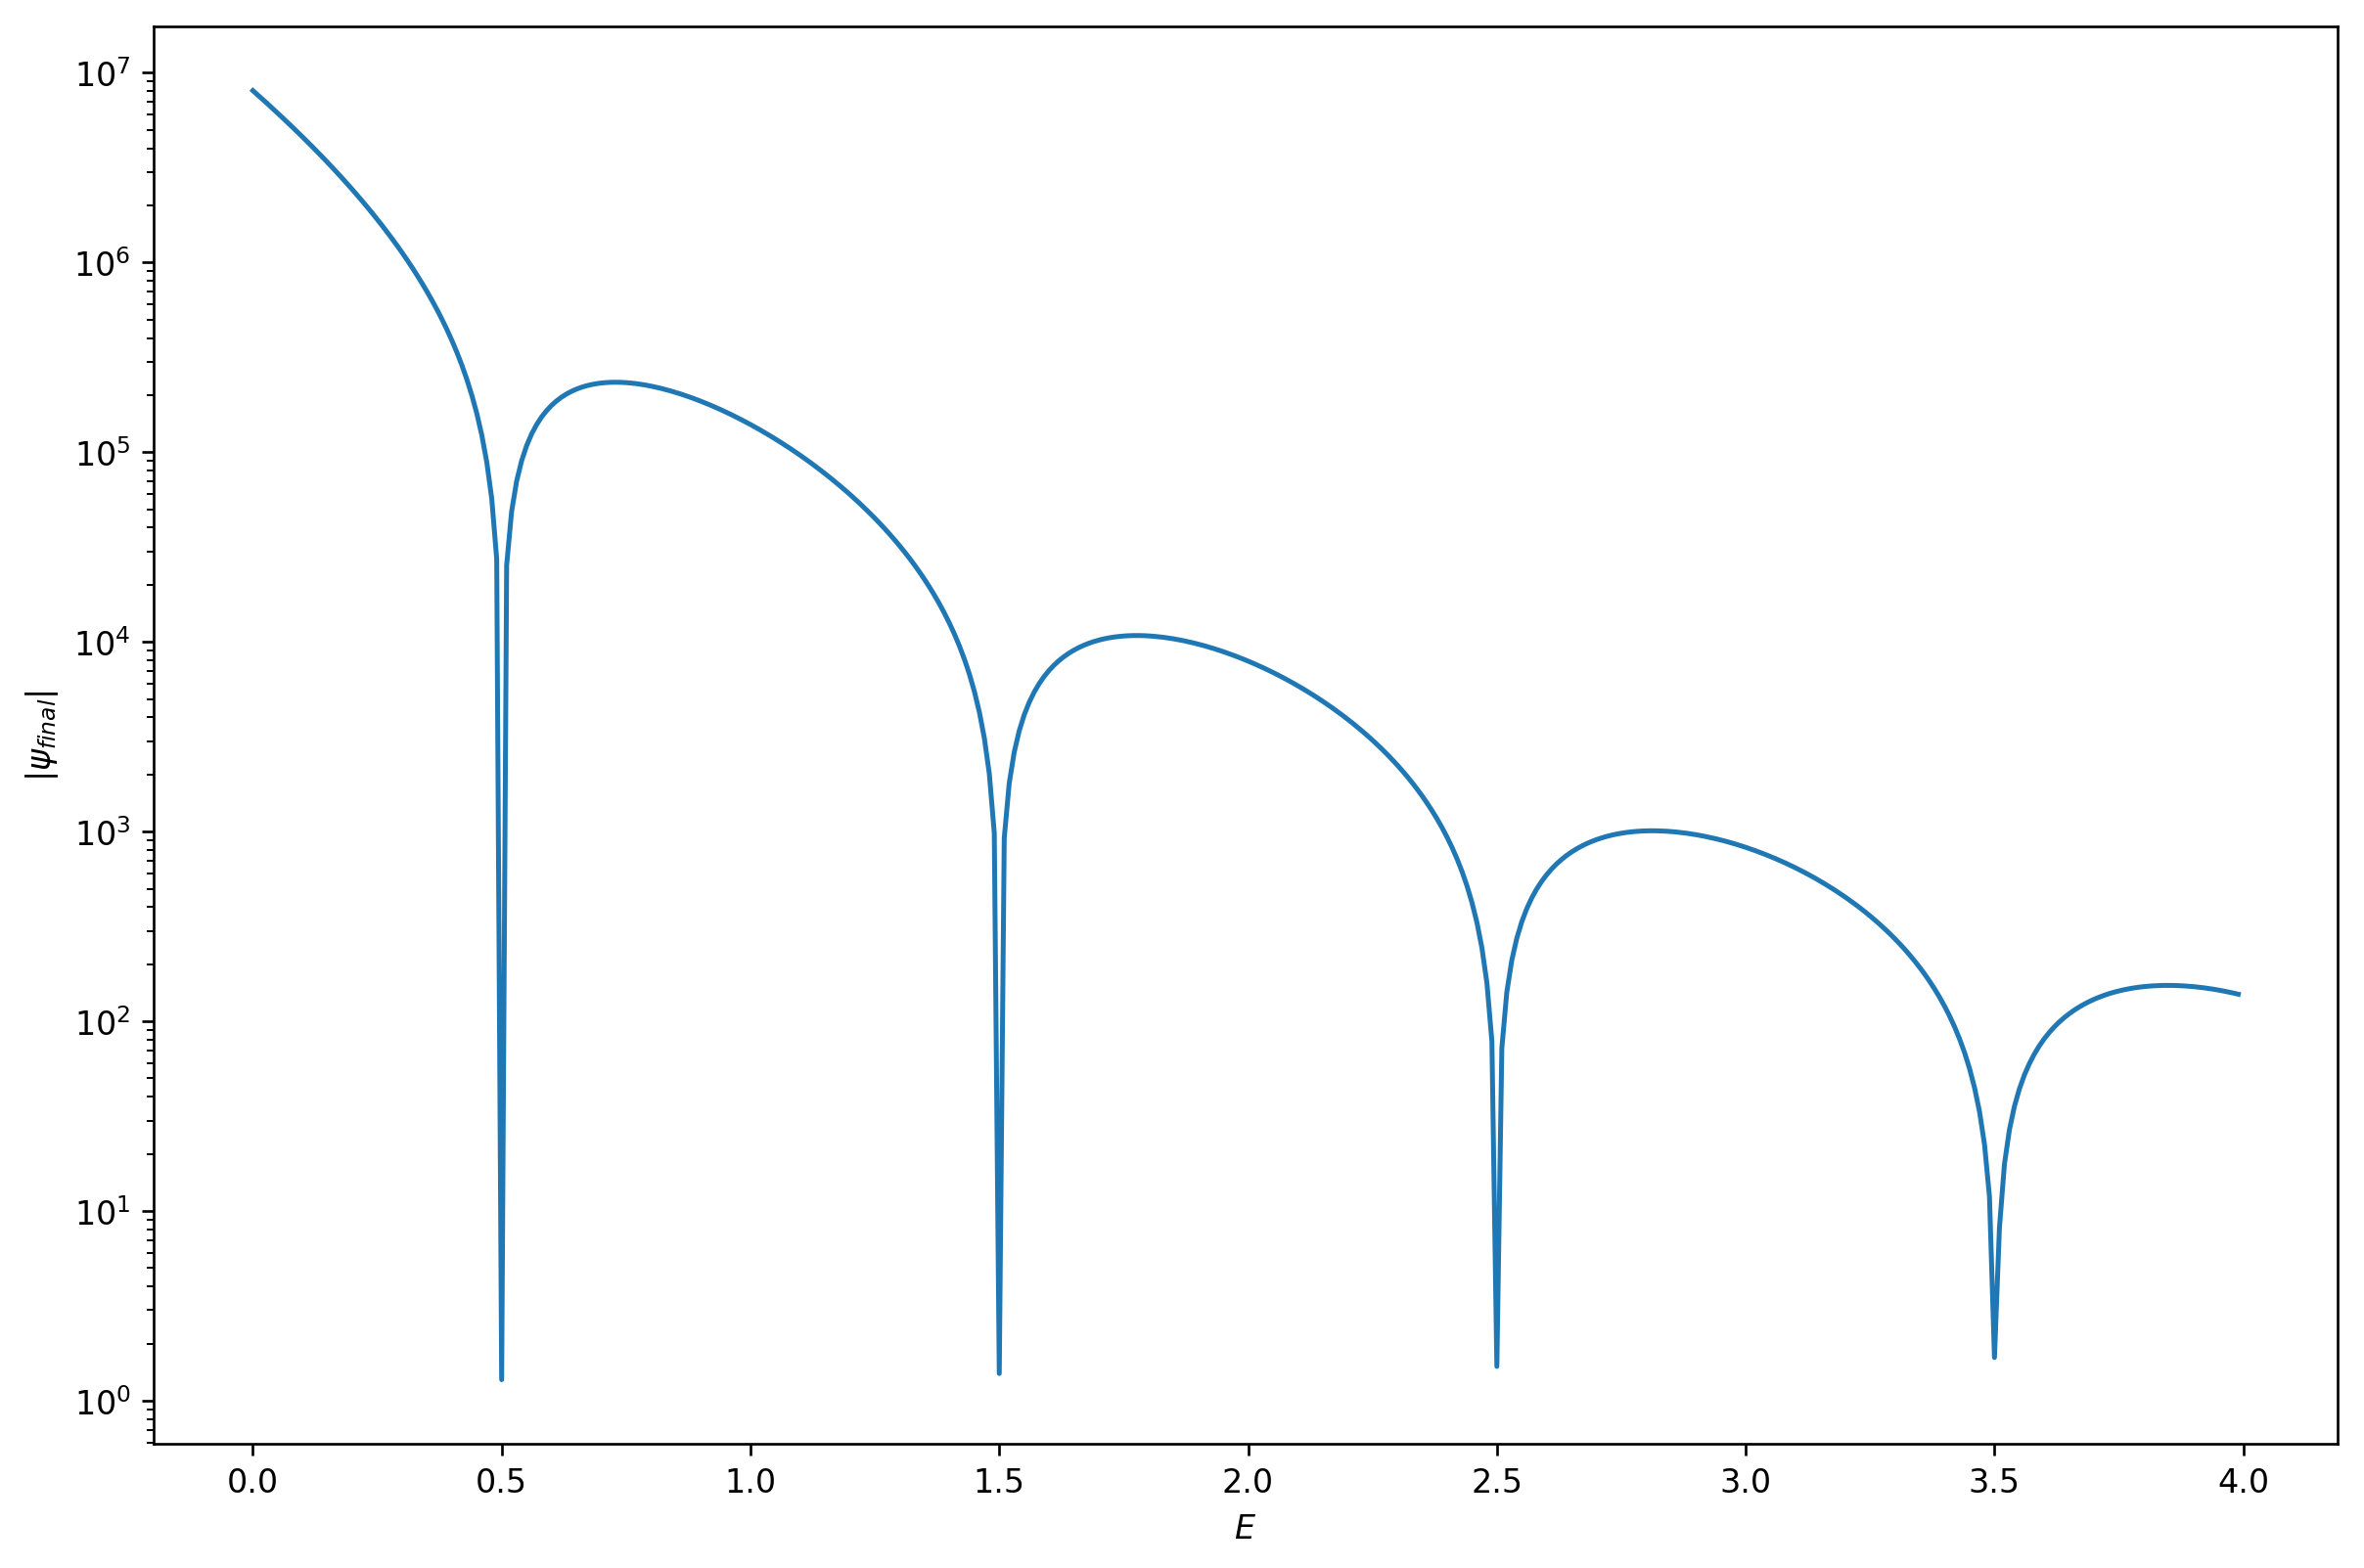

Eigenergy:
0.5
1.5
2.5
3.5


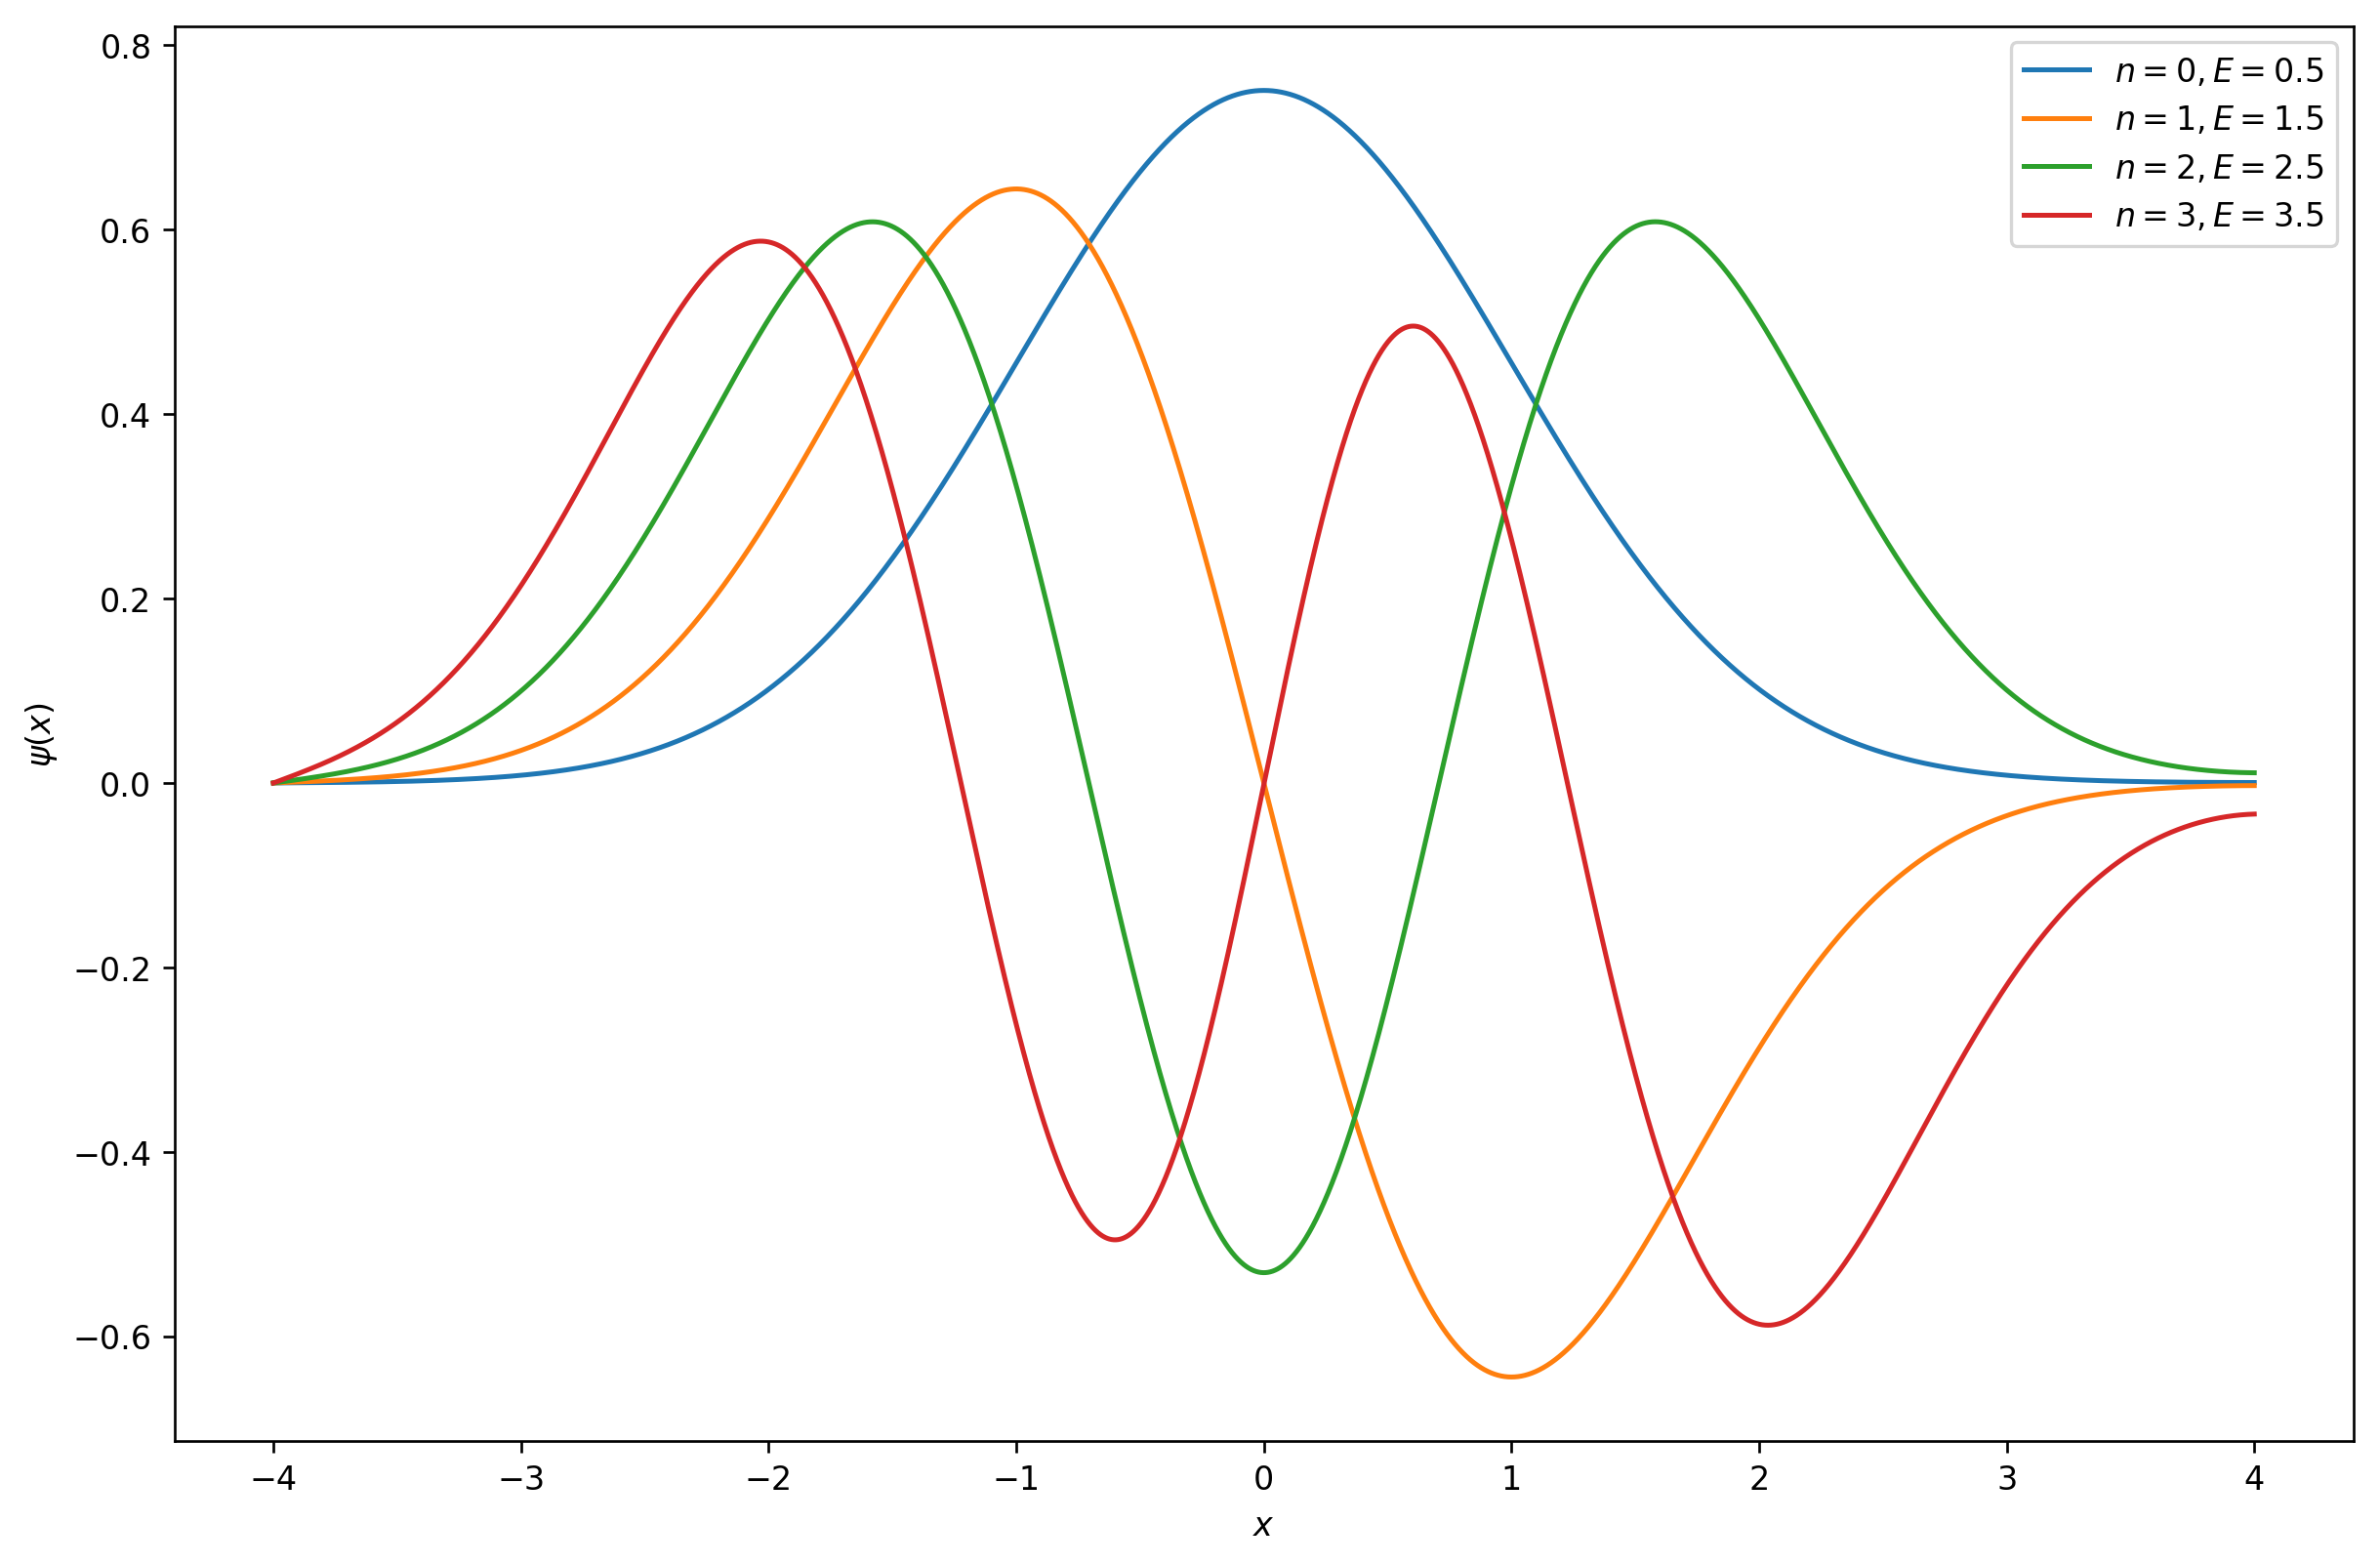

In [244]:
m = 1.
hbar = 1.
omega = 1.

def V(x):
    return 0.5*m*omega**2*x**2

solveEfromV(V,xmin=-4.,xmax=4.,Emin=0.,Emax=4.,Estep=0.01,plotwf=True)